# Credit Card Fraud Detection: An End-to-End Machine Learning Approach

## Project Overview

Credit card fraud detection is a critical real-world problem where the goal is to
identify fraudulent transactions among millions of legitimate ones. One of the
main challenges in this domain is the highly imbalanced nature of the data, where
fraudulent transactions represent a very small fraction of total transactions.

In this project, we build an end-to-end machine learning pipeline to detect
fraudulent credit card transactions using three different models:
- Logistic Regression
- Random Forest
- Gradient Boosting Classifier

Special emphasis is placed on handling class imbalance and evaluating models
using appropriate metrics such as Recall, Precision, and F1-score rather than
accuracy alone.

## Notebook Index

1. Import Required Libraries  
2. Load the Dataset  
3. Data Overview and Understanding  
4. Exploratory Data Analysis (EDA)  
5. Data Preprocessing  
6. Train-Test Split  
7. Model 1: Logistic Regression  
8. Model 2: Random Forest  
9. Model 3: Gradient Boosting Classifier  
10. Model Comparison and Evaluation  
11. Conclusion and Key Insights


## Dataset Information

The dataset used in this project contains credit card transactions made by
European cardholders. Due to confidentiality reasons, most of the features
have been transformed using PCA.

- Total transactions: 284,807  
- Fraudulent transactions: 492  
- Non-fraudulent transactions: 284,315  

The target variable is:
- Class = 0 → Non-Fraud
- Class = 1 → Fraud


# 🧩 SECTION-BY-SECTION CODE IMPLEMENTATION

### 1. Import Required Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


### 2. Load the Dataset

In [2]:
df = pd.read_csv("creditcard.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Data Overview and Understanding

In [3]:
df.info()
df.describe()

# Class distribution
df['Class'].value_counts(normalize=True) * 100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

### 4. Exploratory Data Analysis (EDA)

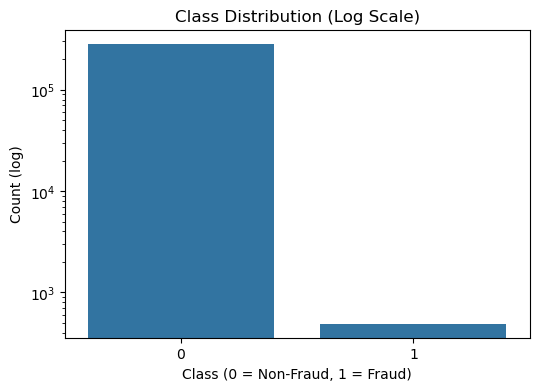

In [4]:
# Class Imbalance (Log Scale)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title("Class Distribution (Log Scale)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count (log)")
plt.show()


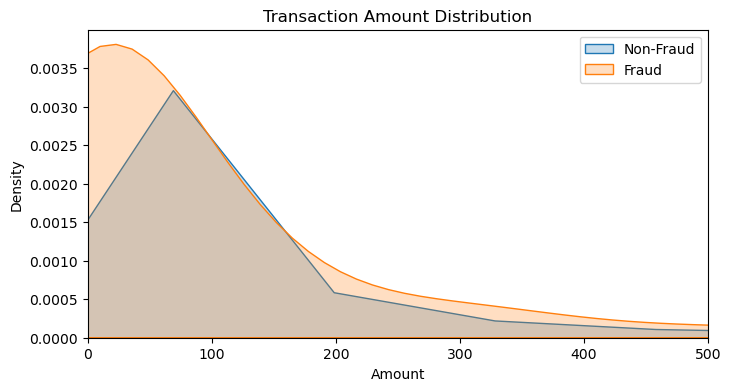

In [5]:
# Transaction Amount Distribution
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Class']==0]['Amount'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['Class']==1]['Amount'], label='Fraud', fill=True)
plt.xlim(0, 500)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.legend()
plt.show()


### 5. Data Preprocessing

In [6]:
# Scale Amount feature
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

# Drop original Amount and Time
df = df.drop(['Amount', 'Time'], axis=1)

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 6. Train-Test Split

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train fraud cases:", y_train.sum())
print("Test fraud cases:", y_test.sum())


Train fraud cases: 394
Test fraud cases: 98


### 7. Model Evaluation Function

In [8]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{name}")
    print("="*60)
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, cmap='Blues'
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc


### Model 1: Logistic Regression


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



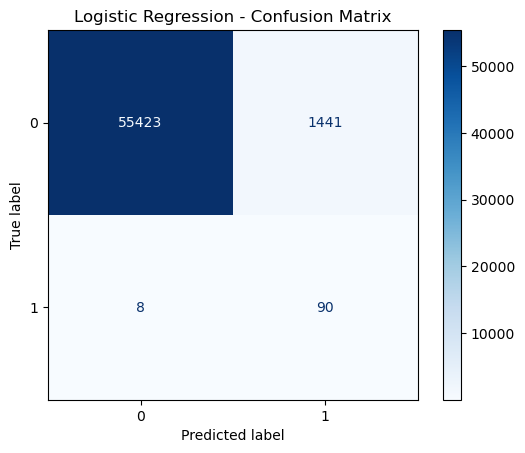

In [9]:
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

fpr_lr, tpr_lr, auc_lr = evaluate_model(
    "Logistic Regression",
    lr,
    X_train, y_train,
    X_test, y_test
)


### Model 2: Random Forest


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



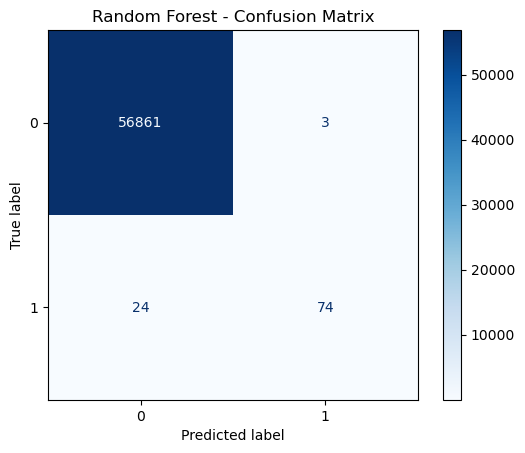

In [10]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

fpr_rf, tpr_rf, auc_rf = evaluate_model(
    "Random Forest",
    rf,
    X_train, y_train,
    X_test, y_test
)


### Model 3: Gradient Boosting Classifier


Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962



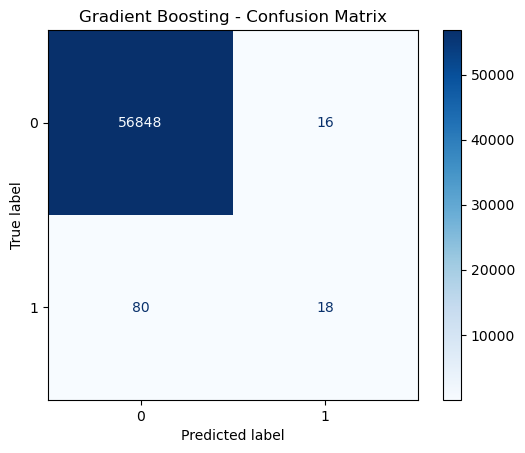

In [11]:
gb = GradientBoostingClassifier(
    random_state=42
)

fpr_gb, tpr_gb, auc_gb = evaluate_model(
    "Gradient Boosting",
    gb,
    X_train, y_train,
    X_test, y_test
)

### 8. ROC Curve Comparison 

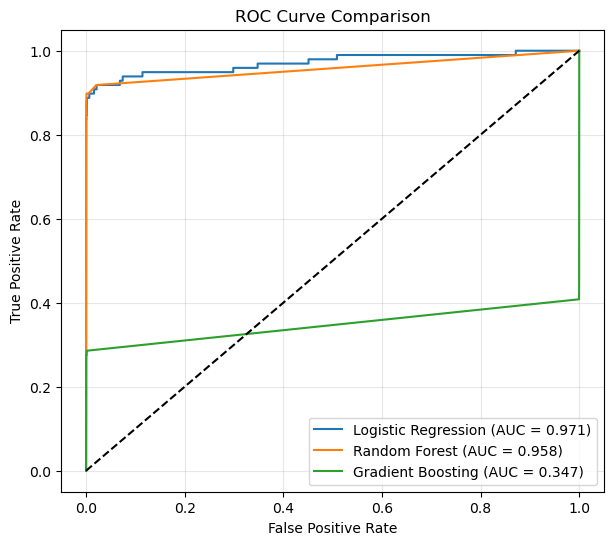

In [12]:
plt.figure(figsize=(7,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### 9. Model Comparison Table

In [13]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'ROC-AUC': [auc_lr, auc_rf, auc_gb]
})

results

,Model,ROC-AUC
0,Logistic Regression,0.971447
1,Random Forest,0.958013
2,Gradient Boosting,0.346886


### 10. Conclusion

This project demonstrated an end-to-end machine learning pipeline for detecting
fraudulent credit card transactions using highly imbalanced data.

Logistic Regression provided a strong and interpretable baseline, achieving the
highest ROC-AUC score due to effective class weighting.

Random Forest captured non-linear patterns and achieved competitive performance,
while Gradient Boosting underperformed on this dataset without advanced tuning.

Overall, Logistic Regression proved to be the most reliable model for this task,
highlighting that simpler models can outperform complex ones in highly imbalanced
settings.